In [2]:
from PIL import Image, ImageFilter
import colorsys
import subprocess 
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas
import random
from platform import python_version
print(python_version())

3.7.3


In [3]:
def preparar_img(name, filtro=None):
    img = Image.open(os.path.join(image_path,name)).convert("L")
    if filtro:
        img = img.filter(filtro)
    width, height = img.size
    data = ""
    imgdata = list(img.getdata())
    for i in range(0,height):        
        indexes = range(i*width,i*width+width)
        data = data + " ".join([str(imgdata[x]) for x in indexes]) + "\n"
    input_text = "{0} {1}\n{2}".format(height,width,data)
    return (height, width, input_text, img)

def crear_colores(N=5):
    HSV_tuples = [(x * 1.0 / N, 0.9, 0.9) for x in range(N)]
    HSV_tuples = random.sample(HSV_tuples, k=len(HSV_tuples))
    res = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        res.append(tuple(rgb))
    return res

def armar_imagen(n, m ,data):
    split_data = [int(j) for i in data.splitlines() for j in i.split(" ") if j != '']
    uniques = set(split_data)

    colores = crear_colores(len(uniques))
    color_dict = dict(zip(uniques, colores))

    img = Image.new("RGB", (m, n))
    for i in range(0, n):
        for j in range(0, m):
            img.putpixel((j, i), color_dict[split_data[i*m + j]])
    return img

def segmentar_imagenes(kRange, images, path):
    for k in kRange:
        for imgName,imgData in images.items():
            completado = subprocess.run(["../../Resolucion/bin/ej1", str(1), str(k), imgName], stdout=subprocess.PIPE, input=imgData[2], universal_newlines=True)
            if completado.returncode != 0:
                print("ERROR: El programa finalizo de forma incorrecta. Parametros usados: k={0} metodo={1}".format(k, 1))
            else:
                img_generada = armar_imagen(imgData[0], imgData[1], str(completado.stdout))

                img_original = imgData[3].convert("RGB")
                max_height = max(img_generada.height, img_original.height)
                total_width = img_generada.width + img_original.width

                comp_img = Image.new("RGB", (total_width, max_height))
                comp_img.paste(img_original, (0, 0))
                comp_img.paste(img_generada, (img_generada.width, 0))
                im_array = np.asarray(comp_img)
                plt.title('{0} | K = {1}'.format(imgName, k), fontsize=16)
                plt.imshow(im_array)
                out_nameimg = "k-" + str(k) + "-" + imgName.replace("_","-")
                plt.savefig(path + out_nameimg, dpi=200, bbox_inches='tight')
                plt.show()

# Experimento Cualitativo 1: Segmentación en general

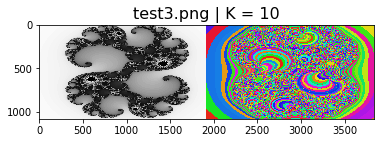

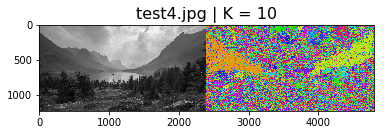

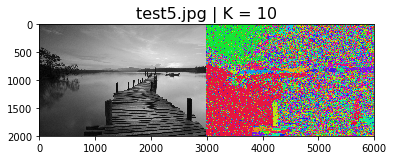

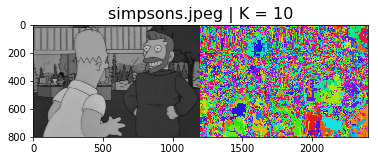

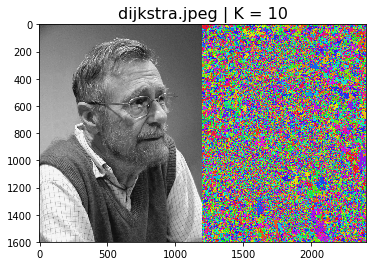

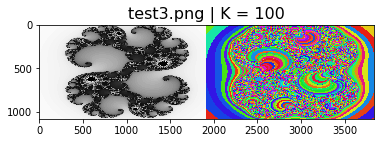

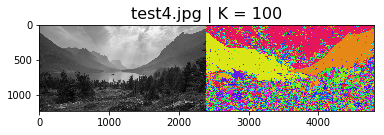

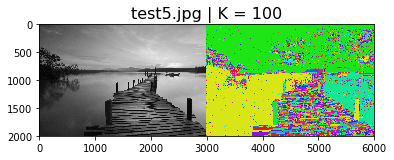

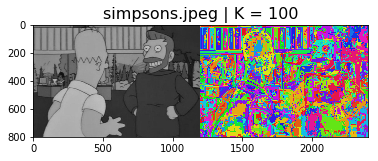

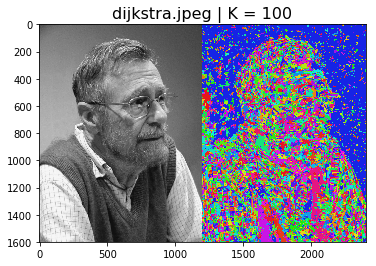

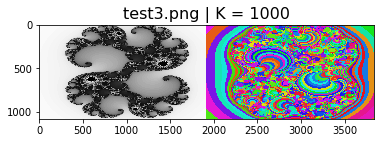

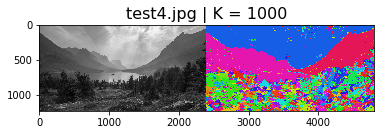

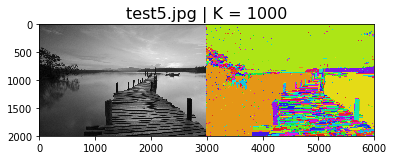

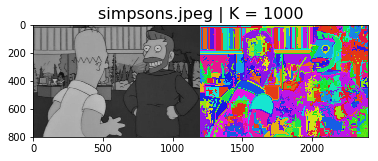

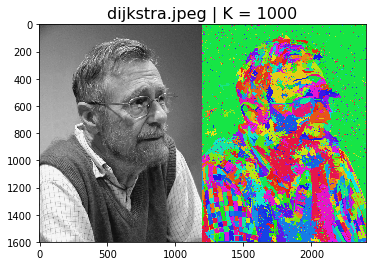

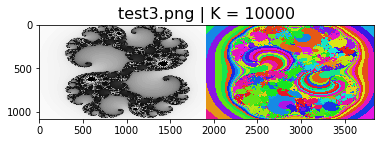

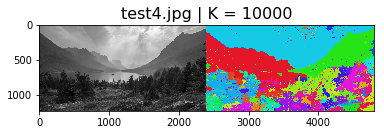

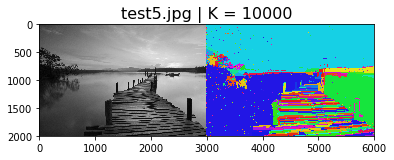

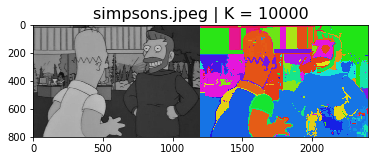

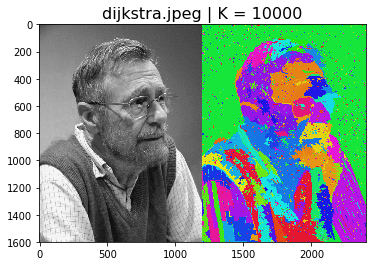

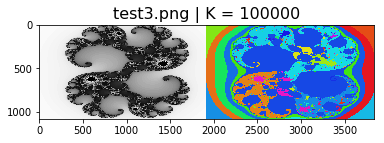

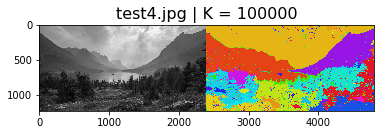

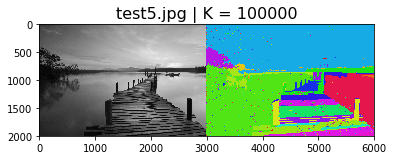

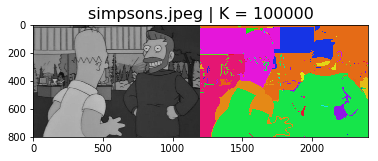

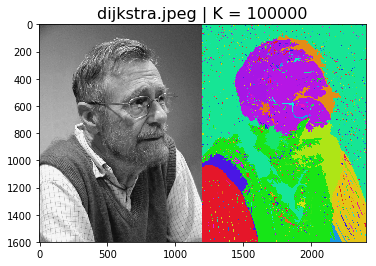

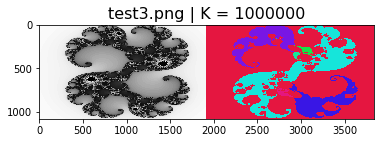

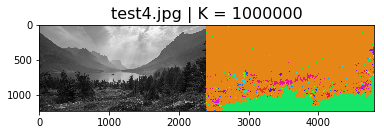

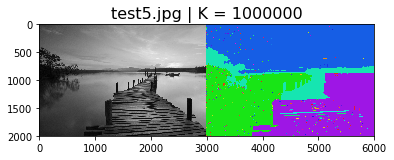

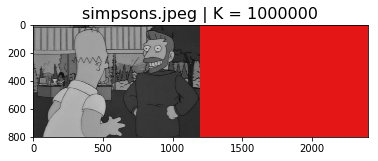

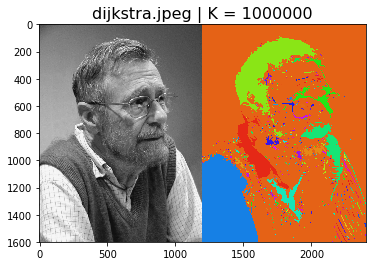

In [8]:
image_path = "../datos_entrada/ej1/"

images = {
        # TODO: Agregar imagenes variadas
        "test3.png": None,
        "test4.jpg": None,
        "test5.jpg": None,
        "simpsons.jpeg": None,
        "dijkstra.jpeg": None,
}

kRange = [10**i for i in range(1, 7)]

for path in images:
    images[path] = preparar_img(path, ImageFilter.GaussianBlur(0.8)) 

segmentar_imagenes(kRange, images, "../graficos_ej1/exp_cualitativos/exp_imagenes_varias/")

# Experimento Cualitativo 2: Segmentación de Calles

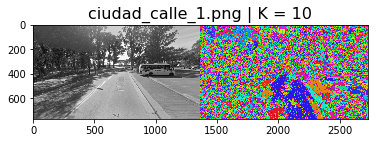

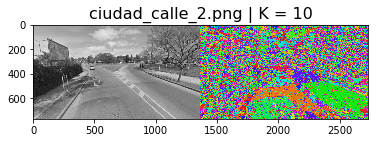

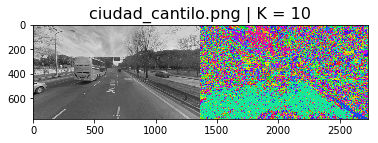

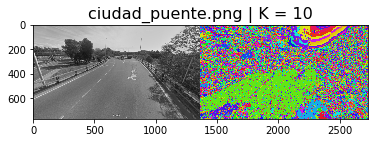

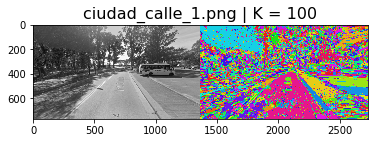

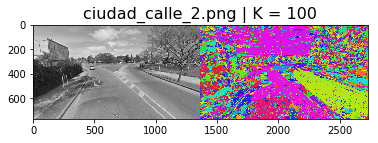

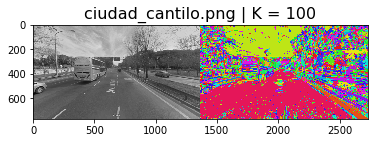

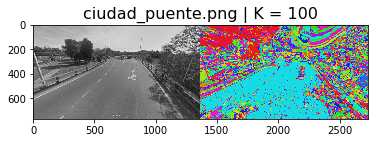

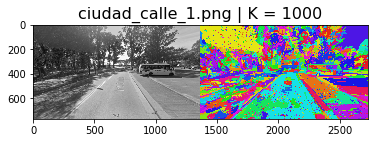

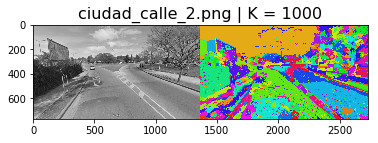

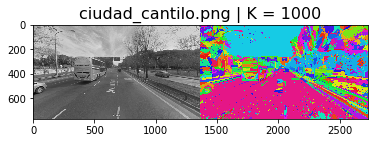

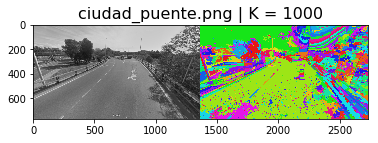

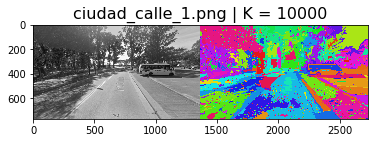

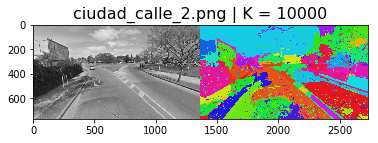

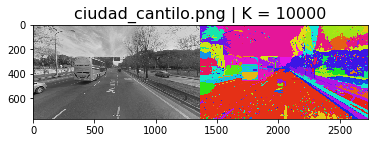

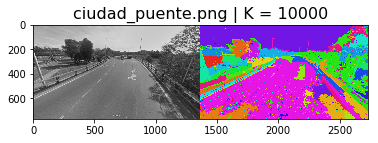

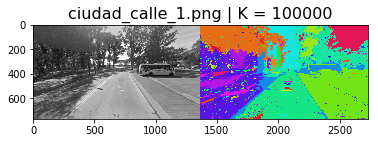

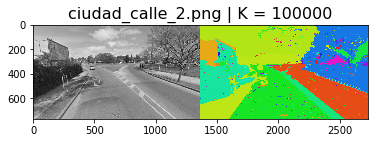

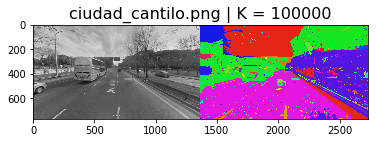

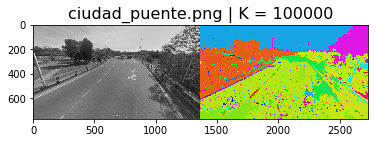

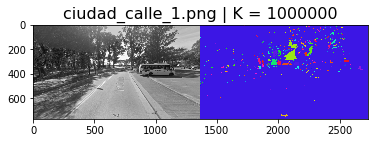

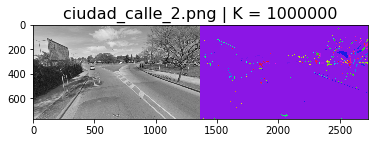

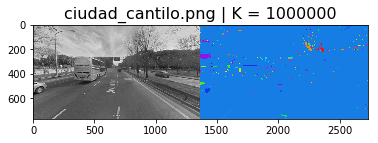

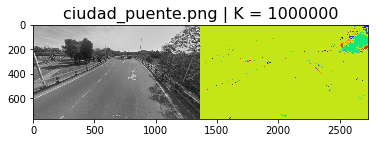

In [8]:
image_path = "../datos_entrada/ej1/"

images = {
        "ciudad_calle_1.png": None,
        "ciudad_calle_2.png": None,
        "ciudad_cantilo.png": None,
        "ciudad_puente.png": None,
}

kRange = [10**i for i in range(1, 7)]

for path in images:
    images[path] = preparar_img(path, ImageFilter.GaussianBlur(0.8)) 

segmentar_imagenes(kRange, images, "../graficos_ej1/exp_cualitativos/exp_auto_reconocer_obj/")